# Aadhaar Enrollment Trend & Anomaly Detection

This notebook analyzes public Aadhaar enrollment data for **Bengaluru Rural district, Karnataka** to identify trends and detect anomalies using AI-assisted statistical methods.

**SDG Alignment:** SDG 11 – Sustainable Cities and Communities  
**Project Type:** AI-assisted Decision Support System  
**Internship:** 1M1B – IBM SkillsBuild – AICTE AI for Sustainability

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
df = pd.read_csv("../Data/aadhar_enrollment_bengaluru_rural.csv")
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,01-06-2025,Karnataka,Bengaluru Urban,560098,52,18,19
1,01-06-2025,Karnataka,Bengaluru Urban,560029,67,27,19
2,01-06-2025,Karnataka,Bengaluru Urban,560045,329,120,24
3,01-06-2025,Karnataka,Bengaluru Urban,560084,83,40,13
4,01-06-2025,Karnataka,Bengaluru Urban,560064,313,156,44


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            97 non-null     object
 1   state           97 non-null     object
 2   district        97 non-null     object
 3   pincode         97 non-null     int64 
 4   age_0_5         97 non-null     int64 
 5   age_5_17        97 non-null     int64 
 6   age_18_greater  97 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.4+ KB


In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df = df.sort_values('date')

In [21]:
df['total_enrollment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

df[['date', 'total_enrollment']].head()

,date,total_enrollment
0,2025-01-06,89
44,2025-01-06,111
45,2025-01-06,330
46,2025-01-06,224
47,2025-01-06,137


In [22]:
df['monthly_growth'] = df['total_enrollment'].pct_change() * 100
df[['date', 'monthly_growth']].head()

,date,monthly_growth
0,2025-01-06,NaN
44,2025-01-06,24.719101
45,2025-01-06,197.297297
46,2025-01-06,-32.121212
47,2025-01-06,-38.839286


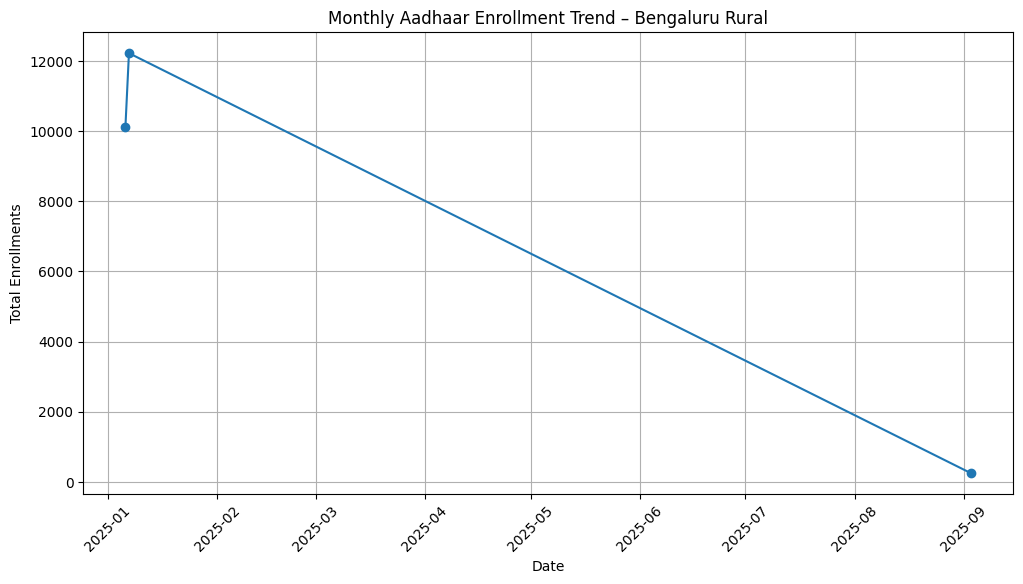

In [29]:
monthly_df = df.groupby('date')['total_enrollment'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_df['date'], monthly_df['total_enrollment'], marker='o')
plt.title("Monthly Aadhaar Enrollment Trend – Bengaluru Rural")
plt.xlabel("Date")
plt.ylabel("Total Enrollments")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("../Visuals/monthly_trend.png", bbox_inches="tight")
plt.show()


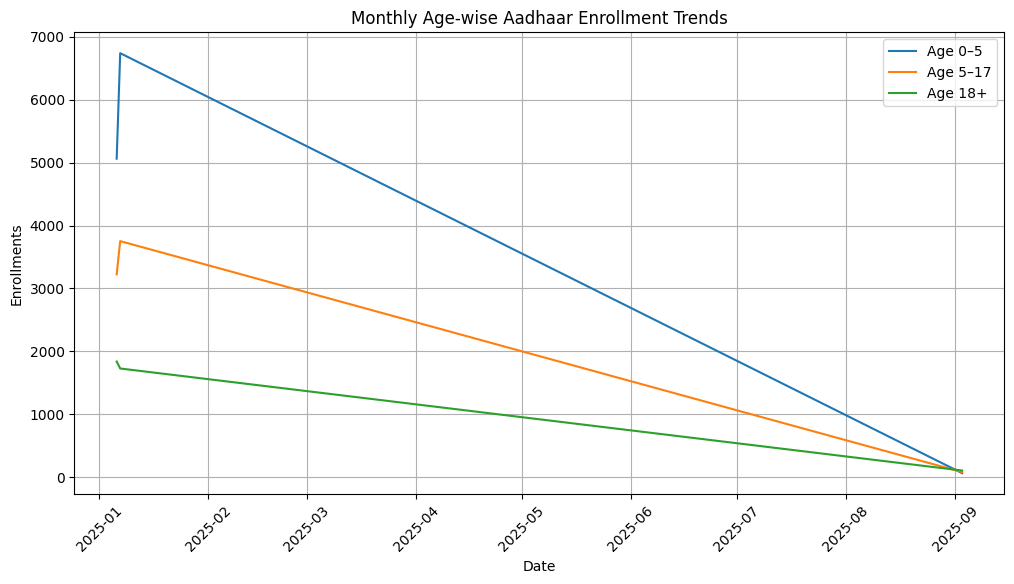

In [ ]:
age_monthly = df.groupby('date')[['age_0_5','age_5_17','age_18_greater']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(age_monthly['date'], age_monthly['age_0_5'], label='Age 0–5')
plt.plot(age_monthly['date'], age_monthly['age_5_17'], label='Age 5–17')
plt.plot(age_monthly['date'], age_monthly['age_18_greater'], label='Age 18+')

plt.title("Monthly Age-wise Aadhaar Enrollment Trends")
plt.xlabel("Date")
plt.ylabel("Enrollments")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig("../Visuals/Age-wise plot.png", bbox_inches="tight")
plt.show()


In [25]:
df['z_score'] = stats.zscore(df['total_enrollment'])
df['anomaly'] = df['z_score'].abs() > 2

df[['date', 'total_enrollment', 'anomaly']].head()

,date,total_enrollment,anomaly
0,2025-01-06,89,False
44,2025-01-06,111,False
45,2025-01-06,330,False
46,2025-01-06,224,False
47,2025-01-06,137,False


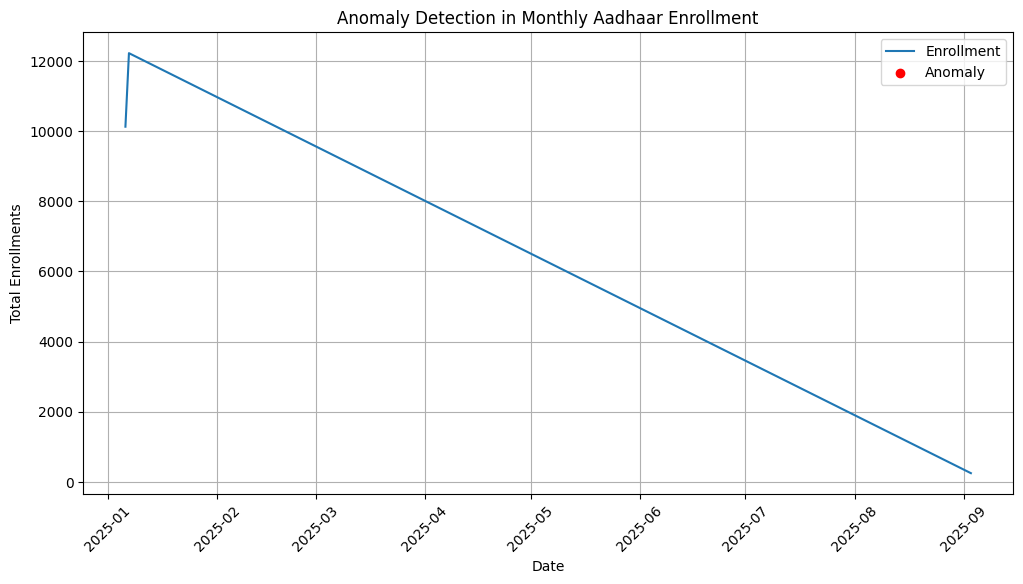

In [31]:
monthly_df['z_score'] = stats.zscore(monthly_df['total_enrollment'])
monthly_df['anomaly'] = monthly_df['z_score'].abs() > 2

plt.figure(figsize=(12,6))
plt.plot(monthly_df['date'], monthly_df['total_enrollment'], label='Enrollment')
plt.scatter(
    monthly_df[monthly_df['anomaly']]['date'],
    monthly_df[monthly_df['anomaly']]['total_enrollment'],
    color='red',
    label='Anomaly',
    zorder=5
)

plt.title("Anomaly Detection in Monthly Aadhaar Enrollment")
plt.xlabel("Date")
plt.ylabel("Total Enrollments")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig("../Visuals/Anomaly plot.png", bbox_inches="tight")
plt.show()


In [27]:
df[df['anomaly']][['date', 'total_enrollment', 'monthly_growth']]

,date,total_enrollment,monthly_growth
5,2025-01-06,676,31.773879
8,2025-01-07,804,1065.217391
57,2025-01-07,635,42.376682


## Responsible AI Considerations

- The project uses only aggregated, publicly available Aadhaar enrollment data.
- No personal, biometric, or sensitive information is used.
- The anomaly detection method is transparent and explainable.
- The analysis is intended for decision support, not surveillance or profiling.

## Conclusion & Sustainability Impact

The analysis highlights long-term enrollment trends and identifies anomalous periods in Aadhaar enrollment for Bengaluru Rural district.  
Such insights can support sustainable digital governance by helping authorities identify service gaps and improve access to digital identity infrastructure.